

# Project: Investigate a Dataset - [TMdB_ Movies]



<a id='intro'></a>
## Introduction

### Dataset Description 

Choosen to investigate the TMDb movie data set, whiche contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. There are 22 columns in this table: 

1. id general id to identify movie in database => will be droped
2. imdb_id ID from the imdb databse => will be droped
3. popularity this took me a while to figure out... Quote from themoviedb.org: "Popularity is a very important metric here on TMDB. It helps us boost search results, adds an incredibly useful sort value for , and is also just kind of fun to see items chart up and down." => will be droped 
4. budget Budget of the movie => keeping this column for questions 
5. revenue Same as Budget => keeping this column for questions 
6. original_title Self Explanatory => not sure whether or not to keep this column, need to further investigate
7. cast Self Explanatory => not usefull for my questions, gonna drop
8. homepage Homepage of the movie => gonna drop this column
10. director Self Explanatory => questions here could be interesting 
11. tagline General tag line. User Input. Drop this one
12. keywords same as tag line
13. overview Some string. Gonna drop this one
14. runtime Run time of the movie, need to investigate data format. Keeping this one
15. genres Description of generes, containing multiple values separated by pipe (|) characters. need to split later. Keeping this one
16. production_companies Companies involved in the movie production. Probably droping
17. release_date Self Explanatory, need to investigate format
18. vote_count Count of how many votes. Keeping this one
19. vote_average Self Explanatory. Keeping this one
20. release_year Self Explanatory. Keeping this one. 
21. budget_adj Budget in 2010 Dollars. Keeping this one. 
22. revenue_adj Revenue in 2010 Dollars. Keeping this one. 


### Question(s) for Analysis
1. Question: Did runtime and budget increse over time?
2. Question: Which genres are most popular from year to year?
3. Question: Does voter average correlate with:
    1. high voter Count
    2. financial movie success (Surplus in budget minus Renvenue)
4. What kinds of properties are associated with movies that have financial success?
5. Which month has the highest grossing numbers



In [140]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as ssn 
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

In [141]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

there are some columns that have null values. Since i dont need most of them i will drop them and then have a look at the remaining columns with null values

In [143]:
df.drop(['id','imdb_id', 'popularity', 'cast','homepage', 'tagline','keywords','overview',
         'production_companies',], axis = 1, inplace = True)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 1018.8+ KB


In [145]:
df[df.genres.isnull()] # genres and director still have Nan values => gonna drop them since they are strings
# need to investigate bugest/revenue = 0 values 

,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,0,0,Belli di papÃ,Guido Chiesa,100,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,0,0,All Hallows' Eve 2,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,10/6/15,13,5.0,2015,0.00000,0.0
997,0,0,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,44,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,0,0,Prayers for Bobby,Russell Mulcahy,88,NaN,2/27/09,57,7.4,2009,0.00000,0.0
1897,0,0,Jonas Brothers: The Concert Experience,Bruce Hendricks,76,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,0,0,Freshman Father,Michael Scott,0,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,0,0,Doctor Who: A Christmas Carol,NaN,62,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,0,0,Vizontele,YÄ±lmaz ErdoÄŸan,110,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,0,0,ì•„ê¸°ì™€ ë‚˜,Kim Jin-Yeong,96,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Danny Boyle,220,NaN,7/27/12,12,8.3,2012,0.00000,0.0


Since i cant fill this NaN values with anything. (they are not numerical data) i will drop them.

In [146]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 12 columns):
budget            10801 non-null int64
revenue           10801 non-null int64
original_title    10801 non-null object
director          10801 non-null object
runtime           10801 non-null int64
genres            10801 non-null object
release_date      10801 non-null object
vote_count        10801 non-null int64
vote_average      10801 non-null float64
release_year      10801 non-null int64
budget_adj        10801 non-null float64
revenue_adj       10801 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 1.1+ MB


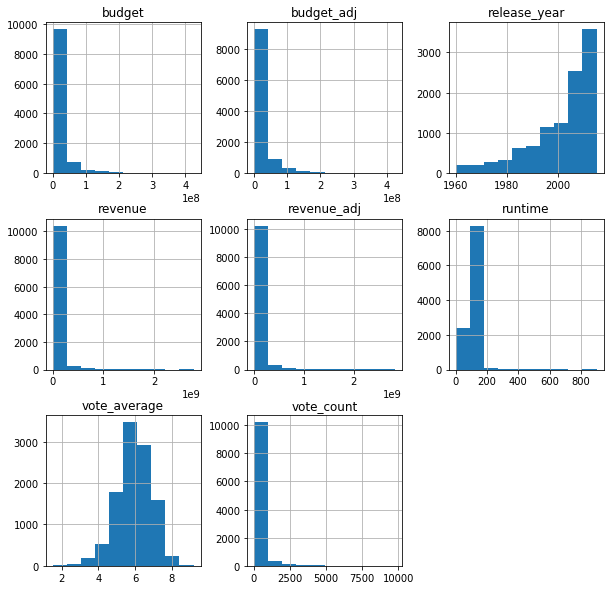

In [147]:
df.hist( figsize = (10,10));

The histogramms show nothing out of the ordinary. In general the movies seem the be a financial success (which is not surprising). Starting with the year 2000 movie releases exploded. Avarge vote seems the be around 6. 

I am also gonna drop the budget and revenue adjusted columns since it should not rly matter whether or not i work with the adjusted or the normal values and integers are easier to handle. I am also gonna drop the title. 

In [148]:
df.drop(['budget_adj','revenue_adj', 'original_title'], axis = 1, inplace = True)

In [149]:
df.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year
count,1.080100e+04,1.080100e+04,10801.000000,10801.000000,10801.00000,10801.000000
mean,1.471255e+07,4.006196e+07,102.188779,218.590686,5.97079,2001.290343
std,3.098568e+07,1.173144e+08,30.782604,577.139279,0.93301,12.819226
min,0.000000e+00,0.000000e+00,0.000000,10.000000,1.50000,1960.000000
25%,0.000000e+00,0.000000e+00,90.000000,17.000000,5.40000,1995.000000
50%,0.000000e+00,0.000000e+00,99.000000,39.000000,6.00000,2006.000000
75%,1.577495e+07,2.453851e+07,111.000000,147.000000,6.60000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.20000,2015.000000


As stated most movies in this Database were released after 2006. it also seems to be that run time increase over time. 

Setting up a function to get statistical data from dataframes

In [150]:
def desc(df_des):
    
    return df_des.describe()

In [151]:
desc(df)

,budget,revenue,runtime,vote_count,vote_average,release_year
count,1.080100e+04,1.080100e+04,10801.000000,10801.000000,10801.00000,10801.000000
mean,1.471255e+07,4.006196e+07,102.188779,218.590686,5.97079,2001.290343
std,3.098568e+07,1.173144e+08,30.782604,577.139279,0.93301,12.819226
min,0.000000e+00,0.000000e+00,0.000000,10.000000,1.50000,1960.000000
25%,0.000000e+00,0.000000e+00,90.000000,17.000000,5.40000,1995.000000
50%,0.000000e+00,0.000000e+00,99.000000,39.000000,6.00000,2006.000000
75%,1.577495e+07,2.453851e+07,111.000000,147.000000,6.60000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.20000,2015.000000


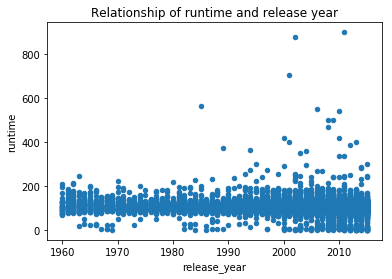

In [152]:
df.plot(y= 'runtime', x = 'release_year', kind = "scatter");
plt.title('Relationship of runtime and release year')
plt.show()

The scatter plot does not show any connection between release year and run time. there are some runaway data points after 1990 but the bulk of data points shows runtime either staying more or less the same or decresing. a line plot should give me further hints. 

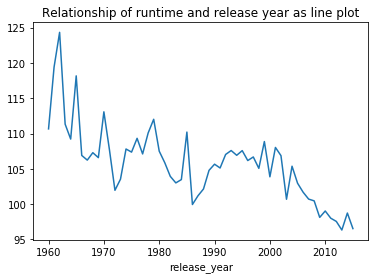

In [153]:
df.groupby('release_year')['runtime'].mean().plot();
plt.title('Relationship of runtime and release year as line plot')
plt.show()

It seems like my original claim was wrong alltho i would like to see if movies that had a budget or revenou were getting longer. 

In [154]:
df_br = df[(df.budget > 10000) & (df.revenue >10000)]

df_br.head()

,budget,revenue,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,110000000,295238201,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,200000000,2068178225,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,190000000,1506249360,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


I will filter all movies that had atleast 1e5 dollars as budget and revenue

In [155]:
desc(df_br)

,budget,revenue,runtime,vote_count,vote_average,release_year
count,3.799000e+03,3.799000e+03,3799.000000,3799.000000,3799.000000,3799.000000
mean,3.763927e+07,1.092082e+08,109.369571,534.009213,6.173019,2001.239010
std,4.230221e+07,1.773464e+08,19.844519,884.584501,0.792245,11.299864
min,1.200000e+04,1.028900e+04,26.000000,10.000000,2.200000,1960.000000
25%,1.000000e+07,1.452172e+07,96.000000,73.000000,5.700000,1995.000000
50%,2.500000e+07,4.624300e+07,106.000000,207.000000,6.200000,2004.000000
75%,5.000000e+07,1.262329e+08,119.000000,584.000000,6.700000,2010.000000
max,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


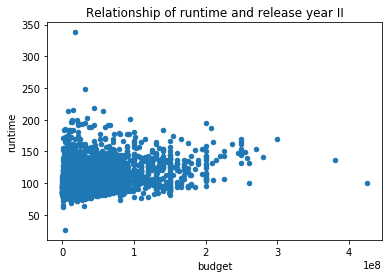

In [156]:
df_br.plot(x = 'budget', y = 'runtime' , kind = 'scatter');
plt.title('Relationship of runtime and release year II')
plt.show()

there seems to be a connection between higher budget and higher runtime. 

Text(0,0.5,'runtime')

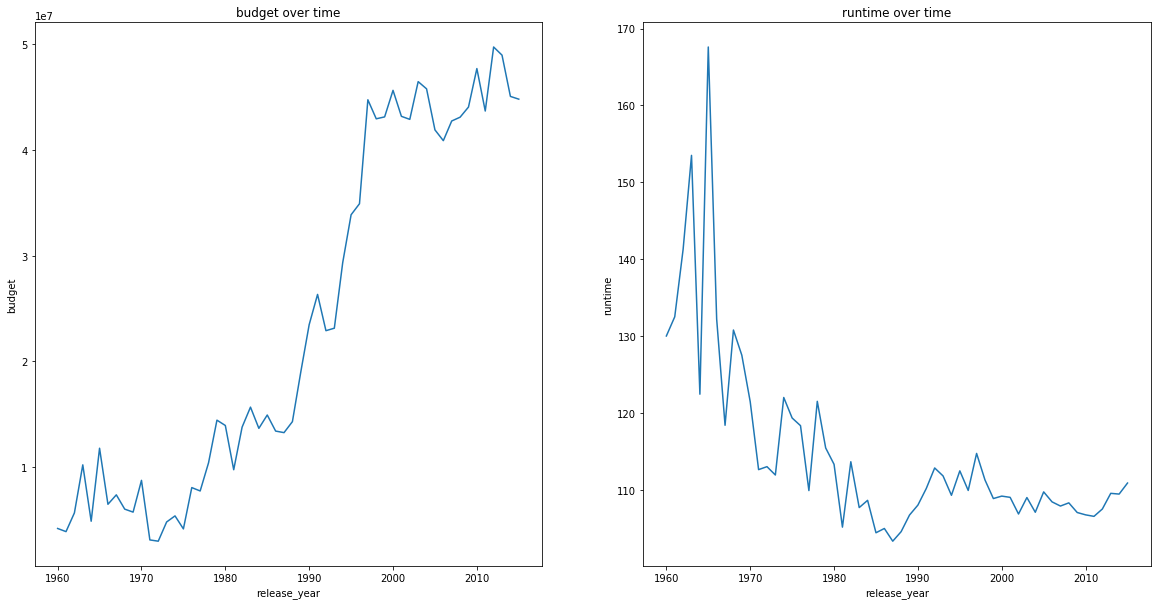

In [157]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize = (20,10))

df_br.groupby('release_year')['budget'].mean().plot(ax = axes[0], subplots=True);
df_br.groupby('release_year')['runtime'].mean().plot(ax = axes[1], subplots=True);

axes[0].set_title('budget over time');
axes[0].set_ylabel('budget')
axes[1].set_title('runtime over time');
axes[1].set_ylabel('runtime')

Several conclusions: 
1. Budget over time did increase
2. From the scatter plot we can conlude that 
    1. there is a correlation between higher butget and higher runtime
    2. but there is a high density of lower budget movies with higher runtime.
3. Surprisingly still movies still had a dip in overall run time during the last 50 years alltho runtime seems to be on the rise again, probably because of the higher production value agter 1980. 

In [158]:
df.head(1)

,budget,revenue,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


# Question 2

Now lets see what kind of Genre was most popular in diffentent times

In [159]:
df_g = df.copy()

Copying the ordiginal dataframe

In [160]:
df_g[['genres', 'genres_2','genres_3','genres_4','genres_5']] = df_g['genres'].str.split('|',expand = True)

the genre collumn sometimes had several different genres, devided by a "|". I will split them up into different columns and treat them like the first genre is the most dominante, ie first association, and so on

In [161]:
df_g.head()

,budget,revenue,director,runtime,genres,release_date,vote_count,vote_average,release_year,genres_2,genres_3,genres_4,genres_5
0,150000000,1513528810,Colin Trevorrow,124,Action,6/9/15,5562,6.5,2015,Adventure,Science Fiction,Thriller,None
1,150000000,378436354,George Miller,120,Action,5/13/15,6185,7.1,2015,Adventure,Science Fiction,Thriller,None
2,110000000,295238201,Robert Schwentke,119,Adventure,3/18/15,2480,6.3,2015,Science Fiction,Thriller,None,None
3,200000000,2068178225,J.J. Abrams,136,Action,12/15/15,5292,7.5,2015,Adventure,Science Fiction,Fantasy,None
4,190000000,1506249360,James Wan,137,Action,4/1/15,2947,7.3,2015,Crime,Thriller,None,None


In [162]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 13 columns):
budget          10801 non-null int64
revenue         10801 non-null int64
director        10801 non-null object
runtime         10801 non-null int64
genres          10801 non-null object
release_date    10801 non-null object
vote_count      10801 non-null int64
vote_average    10801 non-null float64
release_year    10801 non-null int64
genres_2        8490 non-null object
genres_3        5063 non-null object
genres_4        1975 non-null object
genres_5        540 non-null object
dtypes: float64(1), int64(5), object(7)
memory usage: 1.2+ MB


I split up the genres column in differnt entries or associatios with a given movie

In [163]:
genre = ['genres', 'genres_2','genres_3','genres_4','genres_5']
colors =['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

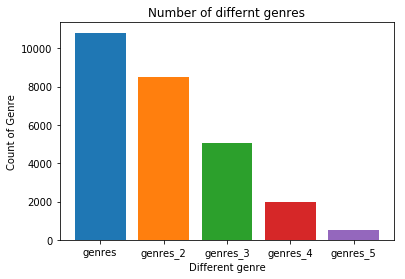

In [164]:
data = df_g[genre].count()

plt.bar(x = [1,2,3,4,5],height =  data, tick_label = genre, color = colors );
plt.title('Number of differnt genres')
plt.xlabel('Different genre')
plt.ylabel('Count of Genre');

In [165]:
df_g['genres_3'].count()

5063

As seen by the plot, most Movies have at least 2 different genres

In [166]:
df_genres = df_g[genre].apply(pd.Series.value_counts).sort_values(by = ['genres'], ascending=False)

In [167]:
df_genres['total'] = df_genres[genre].sum(axis = 1)

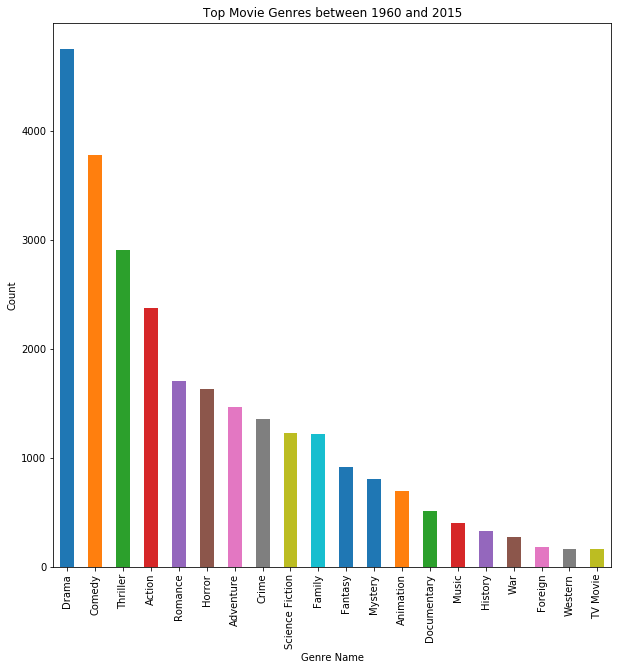

In [168]:
df_genres['total'].sort_values(ascending = False).plot(kind = 'bar', figsize=(10,10));

plt.title('Top Movie Genres between 1960 and 2015')
plt.xlabel('Genre Name')
plt.ylabel('Count')
plt.show()

Drama, Comedy, Thriller and Action are the most popular movie genres in sum. 

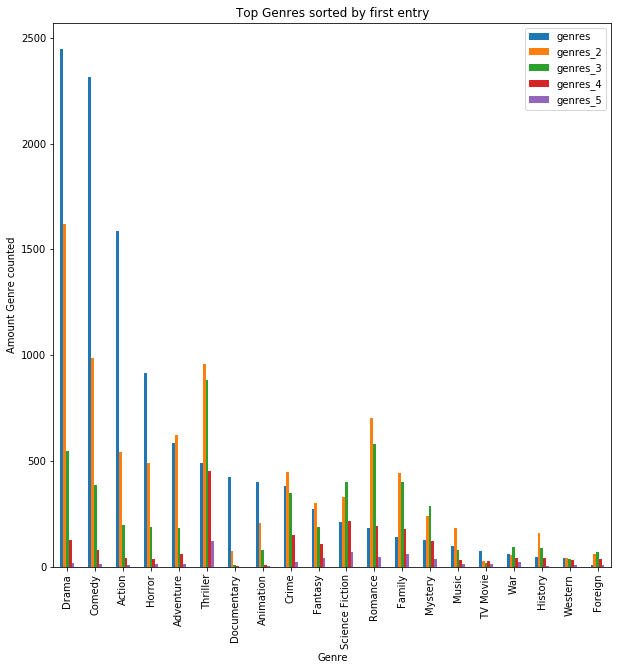

In [169]:
df_genres[genre].sort_values(by = 'genres', ascending = False).plot(kind = 'bar' ,figsize = (10,10))
plt.title('Top Genres sorted by first entry')
plt.xlabel('Genre')
plt.ylabel('Amount Genre counted')
plt.show();

Thats realy interessting. If i sort the genres by the first association (=first entry), the first two entries stay the same while Action, Horror and Adventure are now listed next. 

Thriller have more secondary and tertiary entries then first. This could mean that more people associate thriller as a sub genre to others. Same goes for Crime, Fantasy, Scify, Romance, Family, Mystery and Music. 

Documentary has hardly any secondary entries.  

Now lets see how diffentent movie genres changed over time

In [170]:
df_g.head()

,budget,revenue,director,runtime,genres,release_date,vote_count,vote_average,release_year,genres_2,genres_3,genres_4,genres_5
0,150000000,1513528810,Colin Trevorrow,124,Action,6/9/15,5562,6.5,2015,Adventure,Science Fiction,Thriller,None
1,150000000,378436354,George Miller,120,Action,5/13/15,6185,7.1,2015,Adventure,Science Fiction,Thriller,None
2,110000000,295238201,Robert Schwentke,119,Adventure,3/18/15,2480,6.3,2015,Science Fiction,Thriller,None,None
3,200000000,2068178225,J.J. Abrams,136,Action,12/15/15,5292,7.5,2015,Adventure,Science Fiction,Fantasy,None
4,190000000,1506249360,James Wan,137,Action,4/1/15,2947,7.3,2015,Crime,Thriller,None,None


In [171]:
desc(df_g)

,budget,revenue,runtime,vote_count,vote_average,release_year
count,1.080100e+04,1.080100e+04,10801.000000,10801.000000,10801.00000,10801.000000
mean,1.471255e+07,4.006196e+07,102.188779,218.590686,5.97079,2001.290343
std,3.098568e+07,1.173144e+08,30.782604,577.139279,0.93301,12.819226
min,0.000000e+00,0.000000e+00,0.000000,10.000000,1.50000,1960.000000
25%,0.000000e+00,0.000000e+00,90.000000,17.000000,5.40000,1995.000000
50%,0.000000e+00,0.000000e+00,99.000000,39.000000,6.00000,2006.000000
75%,1.577495e+07,2.453851e+07,111.000000,147.000000,6.60000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.20000,2015.000000


To put the movies into different time periods i creat an assambly of bin edges. these will be associated with every data point. normally i would use a 10 years period but in this case i think that a wide period of 15 years makes the plots more meaningfull. 

In [172]:
bin_edges = [1960, 1975, 1990, 2005, 2015]

In [173]:
bin_names = ["1960", "1975", "1990", "2005"]

In [174]:
df_g['released'] = pd.cut(df_g['release_year'], bin_edges, labels = bin_names)
df_g.head()

,budget,revenue,director,runtime,genres,release_date,vote_count,vote_average,release_year,genres_2,genres_3,genres_4,genres_5,released
0,150000000,1513528810,Colin Trevorrow,124,Action,6/9/15,5562,6.5,2015,Adventure,Science Fiction,Thriller,None,2005
1,150000000,378436354,George Miller,120,Action,5/13/15,6185,7.1,2015,Adventure,Science Fiction,Thriller,None,2005
2,110000000,295238201,Robert Schwentke,119,Adventure,3/18/15,2480,6.3,2015,Science Fiction,Thriller,None,None,2005
3,200000000,2068178225,J.J. Abrams,136,Action,12/15/15,5292,7.5,2015,Adventure,Science Fiction,Fantasy,None,2005
4,190000000,1506249360,James Wan,137,Action,4/1/15,2947,7.3,2015,Crime,Thriller,None,None,2005


In [175]:
df_period = df_g.groupby(['released', 'genres'])[genre].count()
df_period.head()

genres  genres_2  genres_3  genres_4  genres_5
released genres                                                   
1960     Action      107.0     107.0      88.0      46.0      14.0
         Adventure    45.0      45.0      37.0      17.0       7.0
         Animation    18.0      15.0       9.0       3.0       1.0
         Comedy      110.0      85.0      38.0      10.0       1.0
         Crime        37.0      37.0      24.0      13.0       1.0

In [176]:
df_period['total'] = df_period[genre].sum(axis =1)
df_period.sort_values('total', ascending = False).sort_index(level = [0])
df_period.head()

genres  genres_2  genres_3  genres_4  genres_5  total
released genres                                                          
1960     Action      107.0     107.0      88.0      46.0      14.0  362.0
         Adventure    45.0      45.0      37.0      17.0       7.0  151.0
         Animation    18.0      15.0       9.0       3.0       1.0   46.0
         Comedy      110.0      85.0      38.0      10.0       1.0  244.0
         Crime        37.0      37.0      24.0      13.0       1.0  112.0

Filtering the dataframe by genre and timeperiod and creating a total column, that is filled with the sum of each row

In [177]:
#Foltering the Top 5 movie genres of each period. 
top = 5
df_period = df_period.groupby(level=0).apply(lambda df_period: df_period.sort_index(by='total')[-top:])
df_period.index = df_period.index.droplevel(0)
df_period

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


genres  genres_2  genres_3  genres_4  genres_5   total
released genres                                                           
1960     Crime        37.0      37.0      24.0      13.0       1.0   112.0
         Adventure    45.0      45.0      37.0      17.0       7.0   151.0
         Comedy      110.0      85.0      38.0      10.0       1.0   244.0
         Drama       123.0      86.0      42.0      11.0       5.0   267.0
         Action      107.0     107.0      88.0      46.0      14.0   362.0
1975     Horror      166.0     125.0      52.0      13.0       2.0   358.0
         Adventure   106.0     103.0      86.0      46.0      22.0   363.0
         Drama       277.0     209.0     115.0      50.0       6.0   657.0
         Comedy      318.0     225.0      97.0      18.0       4.0   662.0
         Action      240.0     235.0     185.0     110.0      39.0   809.0
1990     Horror      174.0     136.0      70.0      11.0       1.0   392.0
         Adventure   194.0     186.0     175.0     113.0      53.0   721.0
         Drama       773.0     601.0     304.0     110.0      17.0  1805.0
         Comedy      831.0     625.0     284.0      67.0      12.0  1819.0
         Action      576.0     556.0     466.0     266.0      76.0  1940.0
2005     Thriller    332.0     258.0     146.0      47.0       8.0   791.0
         Horror      510.0     364.0     145.0      28.0       1.0  1048.0
         Action      656.0     618.0     477.0     197.0      61.0  2009.0
         Comedy     1047.0     666.0     284.0      59.0      18.0  2074.0
         Drama      1269.0     837.0     399.0     105.0      17.0  2627.0

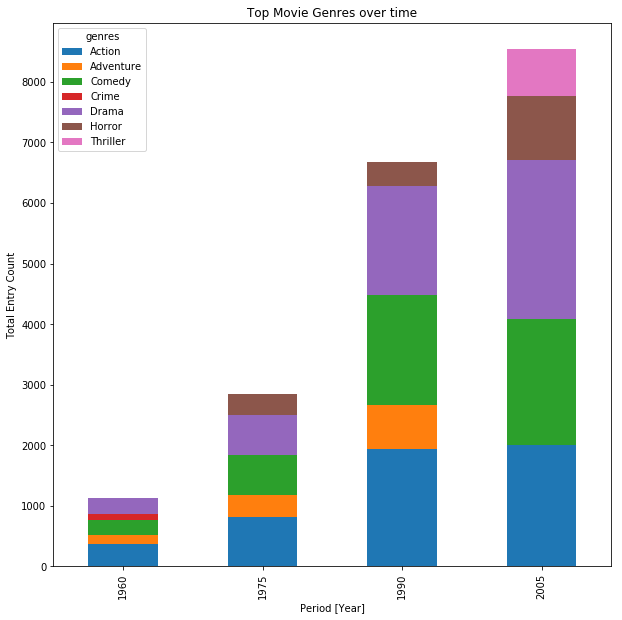

In [178]:
df_period['total'].unstack().plot(kind= 'bar', stacked = True, figsize=(10,10))

plt.title('Top Movie Genres over time')
plt.ylabel('Total Entry Count')
plt.xlabel('Period [Year]')

plt.show()

Its very interesting: While Action, Drama and Comedy seems to be popular thoughout time, Adventure and Crime faded and Horror and Thriller became more and more popular

# Question: Does voter average correlate with:
1. high voter Count
2. financial movie success (Surplus in budget minus Renvenue)

In [179]:
df_g.head()

,budget,revenue,director,runtime,genres,release_date,vote_count,vote_average,release_year,genres_2,genres_3,genres_4,genres_5,released
0,150000000,1513528810,Colin Trevorrow,124,Action,6/9/15,5562,6.5,2015,Adventure,Science Fiction,Thriller,None,2005
1,150000000,378436354,George Miller,120,Action,5/13/15,6185,7.1,2015,Adventure,Science Fiction,Thriller,None,2005
2,110000000,295238201,Robert Schwentke,119,Adventure,3/18/15,2480,6.3,2015,Science Fiction,Thriller,None,None,2005
3,200000000,2068178225,J.J. Abrams,136,Action,12/15/15,5292,7.5,2015,Adventure,Science Fiction,Fantasy,None,2005
4,190000000,1506249360,James Wan,137,Action,4/1/15,2947,7.3,2015,Crime,Thriller,None,None,2005


first let´s do a simple equation to calculate the financial success

In [180]:
df_g['financial_success'] = df_g['revenue'] - df_g['budget']
df_g.head(1)

,budget,revenue,director,runtime,genres,release_date,vote_count,vote_average,release_year,genres_2,genres_3,genres_4,genres_5,released,financial_success
0,150000000,1513528810,Colin Trevorrow,124,Action,6/9/15,5562,6.5,2015,Adventure,Science Fiction,Thriller,None,2005,1363528810


Now let´s filter movies with low success 

In [181]:
df_fs = df_g[df_g['financial_success'] > 100000]

df_fs.shape

(3631, 15)

Since i dont need them to answer my question i will drop them.

In [182]:
df_fs.drop(['budget','revenue', 'director'], axis = 1, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [183]:
df_fs.head()

,runtime,genres,release_date,vote_count,vote_average,release_year,genres_2,genres_3,genres_4,genres_5,released,financial_success
0,124,Action,6/9/15,5562,6.5,2015,Adventure,Science Fiction,Thriller,None,2005,1363528810
1,120,Action,5/13/15,6185,7.1,2015,Adventure,Science Fiction,Thriller,None,2005,228436354
2,119,Adventure,3/18/15,2480,6.3,2015,Science Fiction,Thriller,None,None,2005,185238201
3,136,Action,12/15/15,5292,7.5,2015,Adventure,Science Fiction,Fantasy,None,2005,1868178225
4,137,Action,4/1/15,2947,7.3,2015,Crime,Thriller,None,None,2005,1316249360


To prepare for Question 4 i also want to be able to get the release month of each movie

In [184]:
df_fs[['month','day','year']]=df_fs['release_date'].str.split("/",expand = True)
df_fs.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,runtime,genres,release_date,vote_count,vote_average,release_year,genres_2,genres_3,genres_4,genres_5,released,financial_success,month,day,year
0,124,Action,6/9/15,5562,6.5,2015,Adventure,Science Fiction,Thriller,None,2005,1363528810,6,9,15
1,120,Action,5/13/15,6185,7.1,2015,Adventure,Science Fiction,Thriller,None,2005,228436354,5,13,15
2,119,Adventure,3/18/15,2480,6.3,2015,Science Fiction,Thriller,None,None,2005,185238201,3,18,15
3,136,Action,12/15/15,5292,7.5,2015,Adventure,Science Fiction,Fantasy,None,2005,1868178225,12,15,15
4,137,Action,4/1/15,2947,7.3,2015,Crime,Thriller,None,None,2005,1316249360,4,1,15


In [185]:
desc(df_fs)

,runtime,vote_count,vote_average,release_year,financial_success
count,3631.000000,3631.000000,3631.000000,3631.000000,3.631000e+03
mean,108.679427,538.677499,6.252740,2000.014321,8.386060e+07
std,21.800794,903.153312,0.776275,12.149134,1.499023e+08
min,26.000000,10.000000,2.100000,1960.000000,1.003450e+05
25%,95.000000,60.000000,5.800000,1992.000000,9.000000e+06
50%,105.000000,201.000000,6.300000,2003.000000,3.148956e+07
75%,118.000000,590.000000,6.800000,2010.000000,9.330853e+07
max,705.000000,9767.000000,8.400000,2015.000000,2.544506e+09


The max. run time seems to be 705 Minutes. This is far away from thrid qantil (75%). I will investigate this datapoint and eventually drop it. 

In [186]:
df_fs.query('runtime == 705')

,runtime,genres,release_date,vote_count,vote_average,release_year,genres_2,genres_3,genres_4,genres_5,released,financial_success,month,day,year
2722,705,Action,9/9/01,313,8.0,2001,Drama,War,None,None,1990,125000000,9,9,01


In [187]:
df_fs.drop(2722, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [188]:
desc(df_fs)

,runtime,vote_count,vote_average,release_year,financial_success
count,3630.000000,3630.000000,3630.000000,3630.000000,3.630000e+03
mean,108.515152,538.739669,6.252259,2000.014050,8.384927e+07
std,19.426545,903.269969,0.775840,12.150796,1.499214e+08
min,26.000000,10.000000,2.100000,1960.000000,1.003450e+05
25%,95.000000,60.000000,5.800000,1992.000000,9.000000e+06
50%,105.000000,201.000000,6.300000,2003.000000,3.147817e+07
75%,118.000000,590.000000,6.800000,2010.000000,9.316223e+07
max,254.000000,9767.000000,8.400000,2015.000000,2.544506e+09


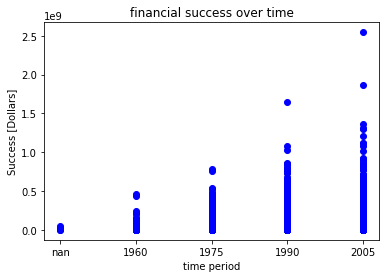

In [189]:
x = df_fs['released']
y = df_fs['financial_success']

plt.scatter(x,y, c = "blue");
plt.title('financial success over time')
plt.xlabel('time period')
plt.ylabel('Success [Dollars]');

I use this plot just to check weather or not my data was correctly manipulated. Since budget increased over time ( i showed this in pervious sections) surpluss should aswell, otherwise there is no reason to poure more and more money in. The plot proves this theory 

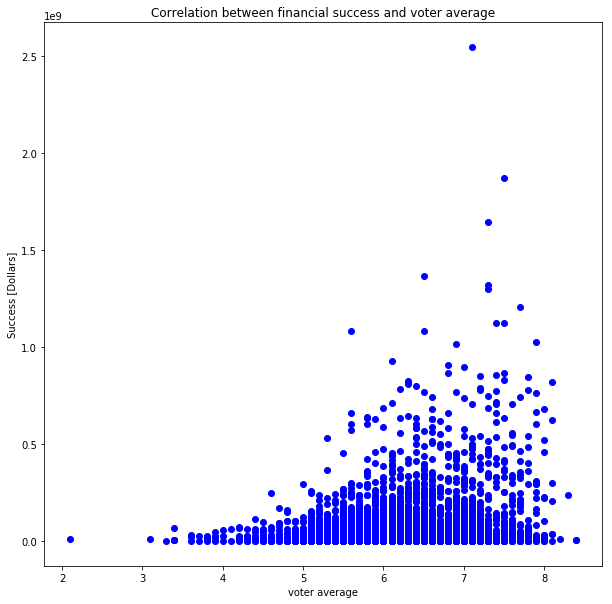

In [190]:
x = df_fs['vote_average']
y = df_fs['financial_success']

plt.figure(figsize=(10,10))
plt.scatter(x,y, c = "blue");
plt.title('Correlation between financial success and voter average')
plt.xlabel('voter average')
plt.ylabel('Success [Dollars]');

The plot shows a possible correlation between financial success and voter average. Meaning more succesfull movies recive in general higher average votes. Additional statistics would be needed to say for sure

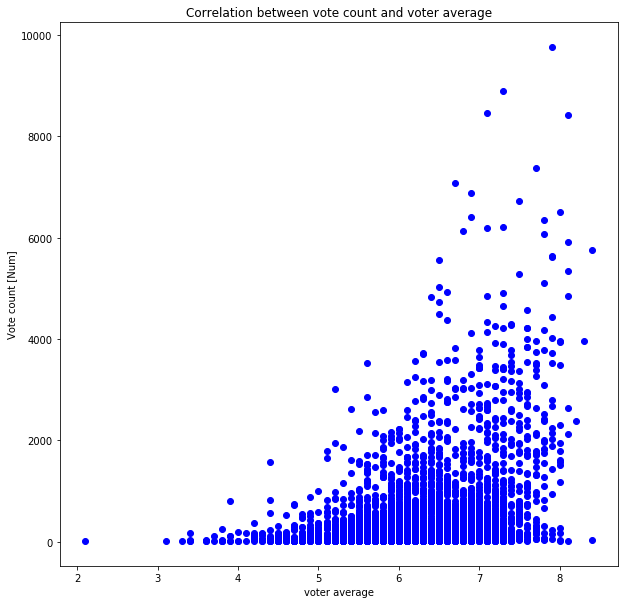

In [191]:
x = df_fs['vote_average']
y = df_fs['vote_count']

plt.figure(figsize=(10,10))
plt.scatter(x,y, c = "blue");
plt.title('Correlation between vote count and voter average')
plt.xlabel('voter average')
plt.ylabel('Vote count [Num]');

The plot shows a possible correlation between vote count and voter average. Meaning more people in general voted for higher average voted movies. Additional statistics would be needed to say for sure.

Conclusion: Voter Average seems to correlate with financial success and vote count. 

# What kinds of properties are associated with movies that have financial success?

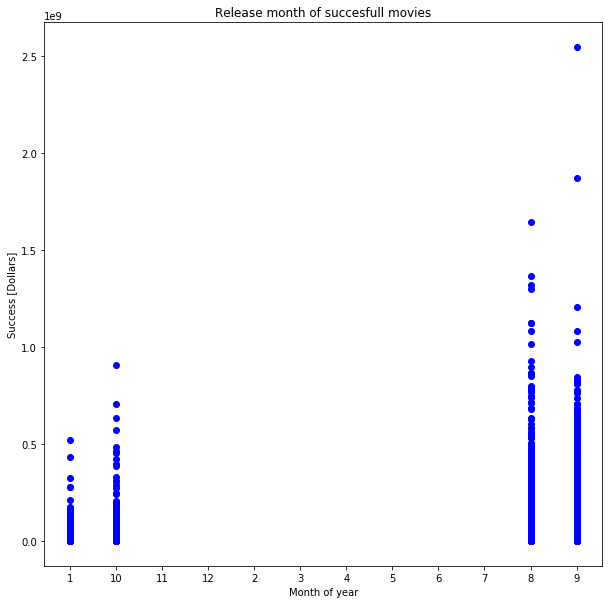

In [192]:
x = df_fs['month']
y = df_fs['financial_success']

plt.figure(figsize=(10,10))
plt.scatter(x,y, c = "blue");
plt.title('Release month of succesfull movies')
plt.xlabel('Month of year')
plt.ylabel('Success [Dollars]');

This does not seem right. According to this plot, there are no succefull movies released between november and september.  

In [193]:
df_fs.dtypes

runtime                 int64
genres                 object
release_date           object
vote_count              int64
vote_average          float64
release_year            int64
genres_2               object
genres_3               object
genres_4               object
genres_5               object
released             category
financial_success       int64
month                  object
day                    object
year                   object
dtype: object

Aha, the datatype of the month column is wrong 

In [194]:
df_fs['month'] = df_fs['month'].astype(int)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Changing the date type of month to an integer

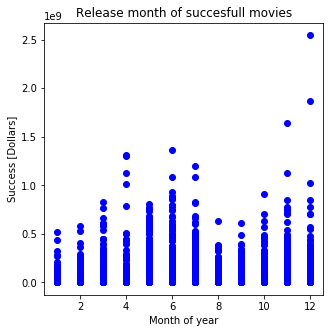

In [195]:
x = df_fs['month']
y = df_fs['financial_success']

plt.figure(figsize=(5,5));
plt.scatter(x,y, c = "blue");
plt.title('Release month of succesfull movies')
plt.xlabel('Month of year')
plt.ylabel('Success [Dollars]');

Much better! From this plot i suspect that the most succefull months are between 5 and 8 and 10 and 12. 

Now lets see what are the charakteristics of the top 75% of movies

In [196]:
bin_edges = [1.003450e+05, 9.000000e+06,3.147817e+07, 9.316223e+07, 2.544506e+09]
bin_names = ["min","25%","50%,","75%"]

Again binning each row according to its financial success quater. 

In [197]:
df_fs['financial_success_quartil'] = pd.cut(df_fs['financial_success'], bin_edges, labels = bin_names)
df_fs.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,runtime,genres,release_date,vote_count,vote_average,release_year,genres_2,genres_3,genres_4,genres_5,released,financial_success,month,day,year,financial_success_quartil
0,124,Action,6/9/15,5562,6.5,2015,Adventure,Science Fiction,Thriller,None,2005,1363528810,6,9,15,75%
1,120,Action,5/13/15,6185,7.1,2015,Adventure,Science Fiction,Thriller,None,2005,228436354,5,13,15,75%
2,119,Adventure,3/18/15,2480,6.3,2015,Science Fiction,Thriller,None,None,2005,185238201,3,18,15,75%
3,136,Action,12/15/15,5292,7.5,2015,Adventure,Science Fiction,Fantasy,None,2005,1868178225,12,15,15,75%
4,137,Action,4/1/15,2947,7.3,2015,Crime,Thriller,None,None,2005,1316249360,4,1,15,75%


In [198]:
df_fs2 = df_fs.groupby(['financial_success_quartil',"genres"])[genre].count()

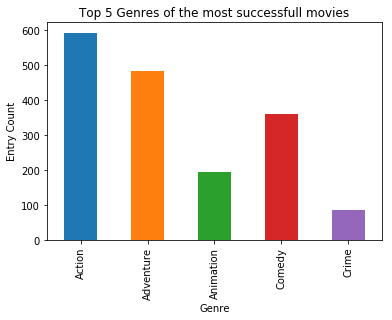

In [199]:
df_top = df_fs2.loc["75%"]
df_top["total"] = df_top[genre].sum(axis = 1)

df_top.sort_values(by = "total", ascending = False)

df_top[:5]["total"].plot(kind = "bar");
plt.title('Top 5 Genres of the most successfull movies');
plt.xlabel('Genre');
plt.ylabel('Entry Count');

This plot shows the top 5 movie genres of, when set in correlation with the thrid quartil of financial success. 

In [200]:
df_fs[df_fs['financial_success_quartil'] == "75%"]

,runtime,genres,release_date,vote_count,vote_average,release_year,genres_2,genres_3,genres_4,genres_5,released,financial_success,month,day,year,financial_success_quartil
0,124,Action,6/9/15,5562,6.5,2015,Adventure,Science Fiction,Thriller,None,2005,1363528810,6,9,15,75%
1,120,Action,5/13/15,6185,7.1,2015,Adventure,Science Fiction,Thriller,None,2005,228436354,5,13,15,75%
2,119,Adventure,3/18/15,2480,6.3,2015,Science Fiction,Thriller,None,None,2005,185238201,3,18,15,75%
3,136,Action,12/15/15,5292,7.5,2015,Adventure,Science Fiction,Fantasy,None,2005,1868178225,12,15,15,75%
4,137,Action,4/1/15,2947,7.3,2015,Crime,Thriller,None,None,2005,1316249360,4,1,15,75%
5,156,Western,12/25/15,3929,7.2,2015,Drama,Adventure,Thriller,None,2005,397950503,12,25,15,75%
6,125,Science Fiction,6/23/15,2598,5.8,2015,Action,Thriller,Adventure,None,2005,285603537,6,23,15,75%
7,141,Drama,9/30/15,4572,7.6,2015,Adventure,Science Fiction,None,None,2005,487380321,9,30,15,75%
8,91,Family,6/17/15,2893,6.5,2015,Animation,Adventure,Comedy,None,2005,1082730962,6,17,15,75%
9,94,Comedy,6/9/15,3935,8.0,2015,Animation,Family,None,None,2005,678708609,6,9,15,75%


# Which month has the highest grossing numbers

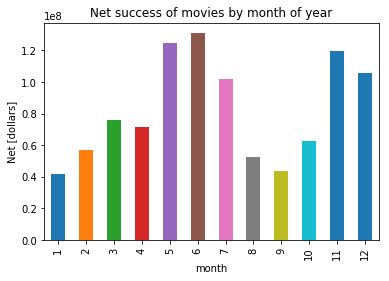

In [201]:
df_fs.groupby('month')['financial_success'].mean().plot(kind ='bar');
plt.title('Net success of movies by month of year');
plt.xlabel('month');
plt.ylabel('Net [dollars]');

Its seems like Mai and June as well as November and December had the highest financial success

# Conclussions:

At the start of this analysis i propossed four questions: 
1. Question: Did runtime and budget increse over time?
2. Question: Which genres are most popular from year to year?
3. Question: Does voter average correlate with:
    1. high voter Count
    2. financial movie success (Surplus in budget minus Renvenue)
4. What kinds of properties are associated with movies that have financial success?
5. Which month has the highest grossing numbers

Q1: while budget incresed over time, runtime did not. A possible explantion could be that after 1990 the amount of movies in this database incresed significantly. This increase could lead to a decrease in runtime since not every movie is made for cinema. Further explotion of the data would be needed here. 

Q2: To get the answer for this question, i first sorted the movies in different time periods of 15 years each:
Action, Drama and Comedy seems to be popular thoughout time, Adventure and Crime faded and Horror and Thriller became more and more popular. 

To further investigate this question i could: 
1. calculate the percentage of each genre for its time period
2. further investigate weather of not the second to fifth genres are correctly interpritated as a degree of association. 

Q3: the plots suggest a correcation between voter average and the two variables A and B. Further statistical analysis like boxplots or linear regressions could improve the validity. 

In [202]:
df.vote_average.mean()

5.9707897416905853

Q4: Unsurprisingly the top genres of high net movies are: action, adventure, comedy, animation and crime. the run time for most is above 110 minutes and they are relase in of after 2005. all of thme received faily high amounts of votes and averaged at atleast 4.4, with even the 25% quartil with 5.9 voter average beeing just below the overall mean of 5.97. 

Q5: Overall movies were most successfully realsed between may and jully and between november and december. Its could be interessting to investigate wether or not this hase been the case thoughout the given time period, because i vagely remember that the movie "jaws" was the first sommer hit, whiche was realease in 1975.  